In [52]:
# The code was removed by Watson Studio for sharing.

In [53]:
iris_df = pd.read_csv(streaming_body_1)

In [3]:
#Data frame lookup using head function
iris_df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
header =['sepal_length','sepal_width','petal_length','petal_width','class']
iris_df.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [5]:
iris_df.columns = header
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [6]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [7]:
#Check if data has null values
#Column Wise check
iris_df.sepal_length.isnull().value_counts()
iris_df.petal_length.isnull().value_counts()
iris_df.sepal_width.isnull().value_counts()
iris_df.sepal_width.isnull().value_counts()

False    149
Name: sepal_width, dtype: int64

In [44]:
#dataframe wise null check
iris_df.isnull().values.any()

False

In [47]:
%matplotlib inline
iris_df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: class, dtype: int64

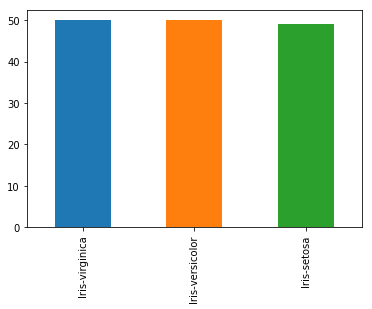

In [51]:
iris_df['class'].value_counts().plot(kind='bar')

## KNN- K nearest Neighbor Algorithm

In [9]:
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_df['class']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [12]:
#import library
from sklearn.neighbors import KNeighborsClassifier

In [13]:
#create Object of Model
ModelObject = KNeighborsClassifier(n_neighbors=4)

In [14]:
#fit model in train set
ModelObject.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [15]:
#Predict value for test set
yDash = ModelObject.predict(X_test)

In [16]:
#Accuracy Evaluation
from sklearn import metrics

In [17]:
print("Train Set Accuracy: ",metrics.accuracy_score(Y_train,ModelObject.predict(X_train)))

Train Set Accuracy:  0.966386554622


In [18]:
print("Test Set Accuracy: ",metrics.accuracy_score(Y_test,yDash))

Test Set Accuracy:  0.966666666667


## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
#optimizer used here liblinear,newton-cg,lbfgs
LR = LogisticRegression(C=0.01,solver='liblinear')
LR.fit(X_train,Y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
yhat = LR.predict(X_test)

In [22]:
print("Train set accuracy:",metrics.accuracy_score(Y_train,LR.predict(X_train)))

Train set accuracy: 0.63025210084


In [23]:
print("Test set accuracy:",metrics.accuracy_score(Y_test,yhat))

Test set accuracy: 0.8


In [24]:
#Jaccard Index or Jaccard Similarity Coefficient - Intersection over Union : Result in 1 for best/max
from sklearn.metrics import jaccard_similarity_score

In [25]:
jaccard_similarity_score(Y_test,yhat)

0.80000000000000004

## Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dTree = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [30]:
dTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
predY =dTree.predict(X_test)

In [33]:
print("Train set Accuracy: ",metrics.accuracy_score(Y_train,dTree.predict(X_train)))

Train set Accuracy:  0.991596638655


In [34]:
print("Test set Accuracy: ",metrics.accuracy_score(Y_test,predY))

Test set Accuracy:  0.933333333333


## SVM

In [37]:
from sklearn.svm import SVC

In [38]:
svmObject = SVC()

In [39]:
svmObject.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
yRes = svmObject.predict(X_test)

In [41]:
print("Accuracy Train Set:",metrics.accuracy_score(Y_train,svmObject.predict(X_train)))

Accuracy Train Set: 0.983193277311


In [42]:
print("Accuracy Test Set:",metrics.accuracy_score(Y_test,yRes))

Accuracy Test Set: 0.966666666667
